Иногда важно представить трехмерные данные в двумерном виде использую контуры или регионы с цветовой кодировкой.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')
import numpy as np

## Визуализация трехмерной функции

Мы начнем с демонстрации контурного графика для функции $z=f(x,y)$, используя следующую функции в качестве функции $f$:

In [2]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

Контурный график может быть построен с помощью функции `plt.contour`. Она принимает три аргумента: двумерный массив значений _x_, двумерный массив значений _y_ и двумерный массив значений _z_. Значения _x_ и _y_ представляют собой позицию на графике, а значения _z_ уровни контуров. Возможно наиболее простым способом подготовить подобные данные является использование функции `np.meshgrid`, которая строит два двумерных массива из одномерных массивов:

In [3]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Давайте теперь посмотрим на стандартный способ построения контурных графиков:

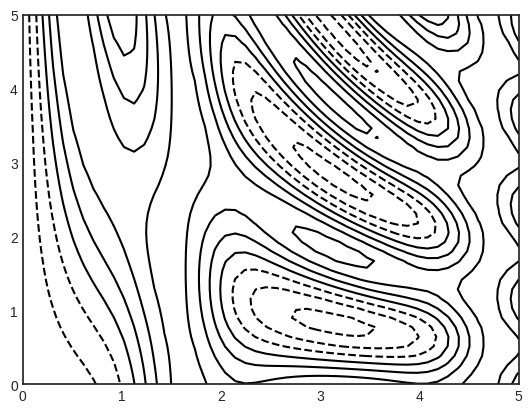

In [4]:
plt.contour(X, Y, Z, colors="black")

Обратите внимание, что при использованиее одноцветного графика, отрицательные значения кодируются штриховой линией. В качестве альтернативы можно закодировать линии с помощью цветовой маски через аргумент `cmap`. Мы также укажем, что нам требуется больше линий - 20 равномерных интервалов:

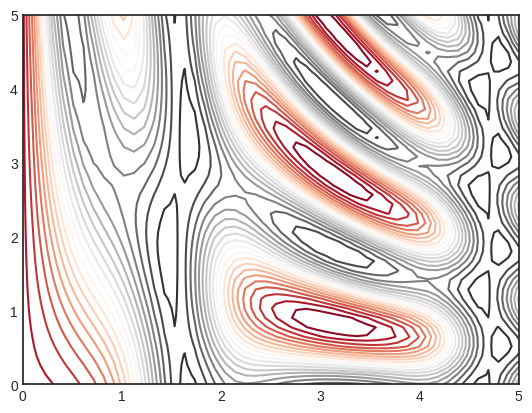

In [5]:
plt.contour(X, Y, Z, 20, cmap='RdGy');

Здесь мы использовали цветовую маску `RdGy` (Red-Gray). В Matplotlib имеется богатый выбор цветовых масок, которые вы можете обнаружить в IPython через ввод `plt.cm` и нажатия Tab:

```sh
plt.cm.<TAB>
```

Наш график выглядит намного лучше теперь, однако пустоты между линиями выглядят немного отвлекающими. Мы можем изменить это путем использования заполненного контурного графика с помощью `plt.contourf()`, обратите внимание на `f` на конце, которая (функция) использует такие же аргументы как и `plt.contour()`.

В дополнение мы используем команду `plt.colorbar()`, которая автоматически создаёт дополнительную ось с цветовыми метками:

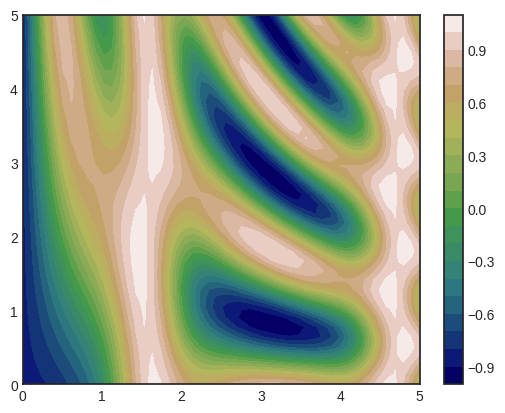

In [9]:
plt.contourf(X, Y, Z, 20, cmap="gist_earth")
plt.colorbar()

Одним из недостатков графика является его "рубленность", т.е. дискретные шаги в цветовом оформлении. Для устранение данного недостатка можно использовать функцию `plt.imshow()`, которая интерполирует двумерные данные в изображение:

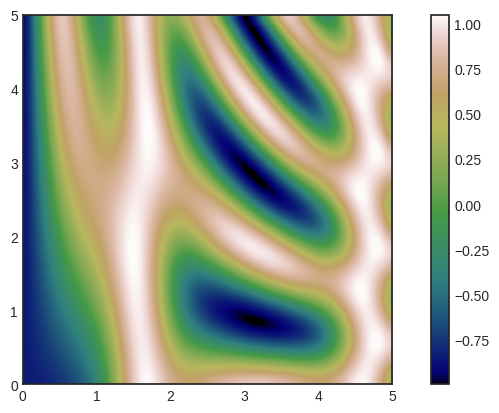

In [33]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin="lower", cmap='gist_earth', interpolation='spline16')
plt.colorbar()
plt.axis('image');

Наконец, иногда может быть полезным скомбинировать контурные графии и изображения. Например:

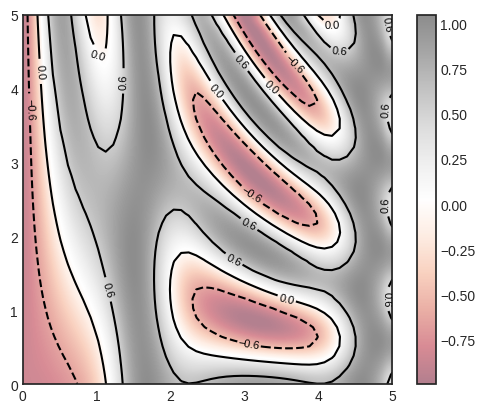

In [35]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='RdGy', alpha=0.5, interpolation="spline16")
plt.colorbar();